## **Basic Statistics for PubMed**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import ast

warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("../PubMed_dataset.csv")

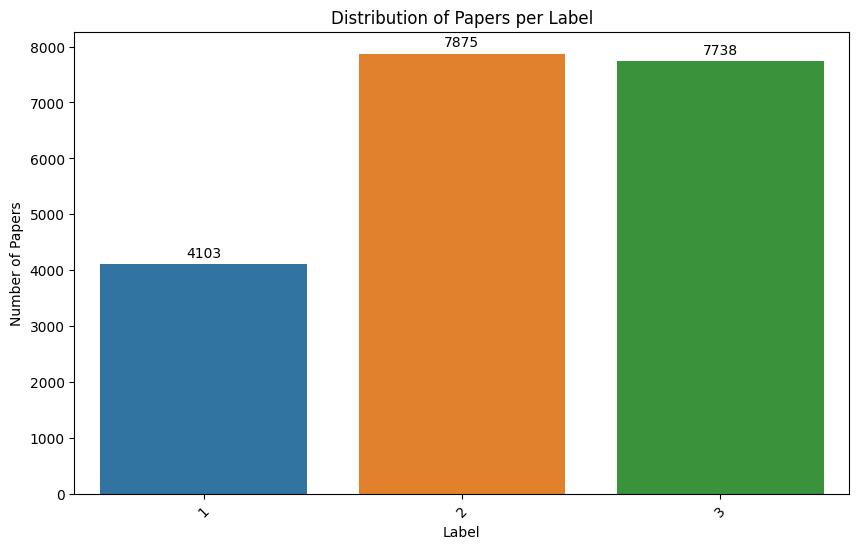

In [ ]:
# Count instances per label
label_counts = dataset['label'].value_counts()

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="tab10")
plt.title("Distribution of Papers per Label")
plt.xlabel("Label")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)

# Add counts on top of bars using bar positions
for bar in ax.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(x_pos, height + max(label_counts.values)*0.01, str(int(height)), ha='center', va='bottom')

plt.show()


In [ ]:
dataset['TFIDF'] = dataset['TFIDF'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Function to get top N words per label based on the cummulative TF-IDF
def top_tfidf_words(df, label_col='label', tfidf_col='TFIDF', top_n=10):
    labels = df[label_col].unique()
    top_words = {}
    
    for lbl in labels:
        subset = df[df[label_col] == lbl]
        word_scores = Counter()
        for tfidf_dict in subset[tfidf_col]:
            word_scores.update(tfidf_dict)
        top_words[lbl] = word_scores.most_common(top_n)
    return top_words

top_words_tfidf = top_tfidf_words(dataset, top_n=7)

# Display
for lbl, words in top_words_tfidf.items():
    print(f"\nLabel {lbl}:")
    for word, score in words:
        print(f"{word}: {score:.4f}")



Label 1:
rat: 278.2934
mice: 104.4729
nerv: 89.2431
activ: 88.5772
anim: 88.2314
cell: 83.8791
streptozotocin: 68.3118

Label 2:
cell: 188.9158
iddm: 181.0965
nod: 145.0986
patient: 144.5892
children: 131.7061
mice: 126.7887
t: 124.1628

Label 3:
0: 149.0784
patient: 137.0470
insulin: 130.8062
2: 127.3325
niddm: 124.0419
glucos: 121.1521
risk: 102.3290


In [13]:
def top_ngrams_per_label(df, text_col='Abstract', label_col='label', ngram_range=(2,3), top_n=10):
    labels = df[label_col].unique()
    top_ngrams = {}
    
    for lbl in labels:
        subset = df[df[label_col] == lbl]
        texts = subset[text_col].dropna().tolist()
        if not texts:
            continue
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
        X = vectorizer.fit_transform(texts)
        sum_words = X.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
        top_ngrams[lbl] = words_freq
    return top_ngrams

top_ngrams = top_ngrams_per_label(dataset, text_col='Abstract', ngram_range=(2,3), top_n=7)

# Display
for lbl, ngrams in top_ngrams.items():
    print(f"\nLabel {lbl}:")
    for ngram, count in ngrams:
        print(f"{ngram}: {count}")



Label 1:
diabetic rats: 5197
mg kg: 1256
diabetic animals: 1074
diabetes mellitus: 939
streptozotocin induced: 879
control rats: 868
induced diabetic: 858

Label 2:
type diabetes: 7775
diabetes mellitus: 3576
insulin dependent: 3445
diabetic patients: 2827
dependent diabetes: 2568
insulin dependent diabetes: 2546
nod mice: 2203

Label 3:
type diabetes: 11331
diabetes mellitus: 3704
diabetic patients: 3059
insulin resistance: 2771
patients type: 2502
patients type diabetes: 2196
glucose tolerance: 2024
